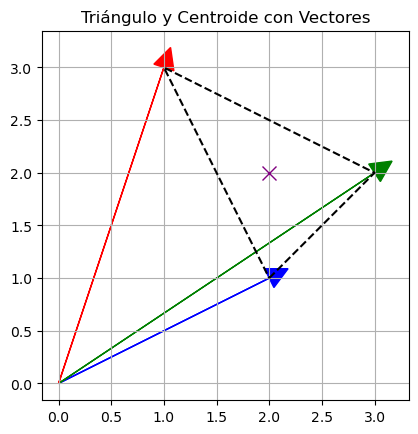

In [9]:
import matplotlib.pyplot as plt
import numpy as np

def calcular_centroide(v1, v2, v3):
    # Calcular las coordenadas del centroide
    x = (v1[0] + v2[0] + v3[0]) / 3
    y = (v1[1] + v2[1] + v3[1]) / 3
    return x, y

def dibujar_trianguo_y_centroide(v1, v2, v3):
    # Dibujar los vectores
    plt.arrow(0, 0, v1[0], v1[1], head_width=0.2, head_length=0.2, fc='blue', ec='blue')
    plt.arrow(0, 0, v2[0], v2[1], head_width=0.2, head_length=0.2, fc='green', ec='green')
    plt.arrow(0, 0, v3[0], v3[1], head_width=0.2, head_length=0.2, fc='red', ec='red')

    # Dibujar el triángulo
    plt.plot([v1[0], v2[0], v3[0], v1[0]], [v1[1], v2[1], v3[1], v1[1]], linestyle='dashed', color='black')

    # Calcular el centroide
    centroid = calcular_centroide(v1, v2, v3)

    # Dibujar el centroide
    plt.plot(centroid[0], centroid[1], marker='x', markersize=10, color='purple')

    # Configurar aspectos del gráfico
    plt.gca().set_aspect('equal', adjustable='box')
    plt.grid(True)
    plt.title('Triángulo y Centroide con Vectores')
    plt.show()

def main():
    # Definir los vectores que representan los lados del triángulo
    v1 = np.array([2, 1])
    v2 = np.array([3, 2])
    v3 = np.array([1, 3])

    # Dibujar el triángulo y su centroide con vectores
    dibujar_trianguo_y_centroide(v1, v2, v3)

if __name__ == "__main__":
    main()


In [8]:
import numpy as np

def operaciones_con_vectores(a, b, c, d):
    suma_1 = a + b + c + d
    resta_1 = a + b - c - d
    resta_2 = a - b + c - d
    resta_3 = -a + b - c + d
    producto_punto_ab_cd = np.dot(a + b, c + d)

    producto_cruz_ab = np.cross(a, b)
    producto_cruz_bc = np.cross(b, c)
    producto_cruz_cd = np.cross(c, d)

    producto_punto_cruz_ac = np.dot(c, np.cross(a, b))

    return suma_1, resta_1, resta_2, resta_3, producto_punto_ab_cd, producto_cruz_ab, producto_cruz_bc, producto_cruz_cd, producto_punto_cruz_ac

def calcular_angulo_entre_vectores(v1, v2):
    producto_punto = np.dot(v1, v2)
    magnitud_v1 = np.linalg.norm(v1)
    magnitud_v2 = np.linalg.norm(v2)
    cos_theta = producto_punto / (magnitud_v1 * magnitud_v2)
    angulo_radianes = np.arccos(np.clip(cos_theta, -1.0, 1.0))
    angulo_grados = np.degrees(angulo_radianes)
    return angulo_grados

def calcular_proyeccion_sobre_vector(v, u):
    magnitud_u = np.linalg.norm(u)
    proyeccion = (np.dot(v, u) / magnitud_u**2) * u
    return proyeccion

def verificar_coplanaridad(v1, v2, v3, v4):
    matriz_coplanaridad = np.vstack((v1, v2, v3, v4))
    rank_matriz = np.linalg.matrix_rank(matriz_coplanaridad)
    return rank_matriz < 4

def main():
    # Definir los cuatro vectores
    a = np.array([1, 2, 3])
    b = np.array([4, 5, 6])
    c = np.array([3, 2, 1])
    d = np.array([6, 5, 4])
    
    # Definir vectores base e_1, e_2, e_3
    e1 = np.array([1, 0, 0])
    e2 = np.array([0, 1, 0])
    e3 = np.array([0, 0, 1])
    
    # Realizar las operaciones con los vectores
    resultado_suma, resultado_resta_1, resultado_resta_2, resultado_resta_3, _, _, _, _, _ = operaciones_con_vectores(a, b, c, d)

    # Imprimir resultados
    print("\nResultados de operaciones:")
    print("1. a + b + c + d =", resultado_suma)
    print("2. a + b - c - d =", resultado_resta_1)
    print("3. a - b + c - d =", resultado_resta_2)
    print("4. -a + b - c + d =", resultado_resta_3)

     # Calcular y mostrar el ángulo entre los vectores y los vectores base
    print("\nÁngulos entre los vectores y los vectores base:")
    for vector in [a, b, c, d]:
        angulo_e1 = calcular_angulo_entre_vectores(vector, e1)
        angulo_e2 = calcular_angulo_entre_vectores(vector, e2)
        angulo_e3 = calcular_angulo_entre_vectores(vector, e3)
        print(f"Ángulo entre el vector {vector} y e1: {angulo_e1} grados")
        print(f"Ángulo entre el vector {vector} y e2: {angulo_e2} grados")
        print(f"Ángulo entre el vector {vector} y e3: {angulo_e3} grados")
        print()
        
    # Calcular y mostrar la magnitud de cada vector
    for i, vector in enumerate([a, b, c, d], 1):
        magnitud = np.linalg.norm(vector)
        print(f"Magnitud del vector {i} ({vector}): {magnitud}")

    # Calcular y mostrar el ángulo entre los vectores a y b
    angulo_ab = calcular_angulo_entre_vectores(a, b)
    print(f"\nÁngulo entre los vectores a y b: {angulo_ab} grados")

    # Calcular y mostrar el ángulo entre los vectores c y d
    angulo_cd = calcular_angulo_entre_vectores(c, d)
    print(f"Ángulo entre los vectores c y d: {angulo_cd} grados")

    # Calcular la proyección de a sobre b
    proyeccion_ab = calcular_proyeccion_sobre_vector(a, b)
    print(f"\nProyección de a sobre b: {proyeccion_ab}")

    # Verificar coplanaridad
    coplanaridad = verificar_coplanaridad(a, b, c, d)
    if coplanaridad:
        print("\nLos vectores son coplanares.")
    else:
        print("\nLos vectores no son coplanares.")

    # Calcular el producto punto entre (a+b) y (c+d)
    producto_punto_ab_cd = np.dot(a + b, c + d)
    print(f"\nProducto punto entre (a+b) y (c+d): {producto_punto_ab_cd}")

    # Calcular los productos cruz a x b, b x c, c x d
    producto_cruz_ab = np.cross(a, b)
    producto_cruz_bc = np.cross(b, c)
    producto_cruz_cd = np.cross(c, d)

    # Calcular y mostrar el ángulo entre los productos cruz y el vector d
    angulo_cruz_ab_d = calcular_angulo_entre_vectores(producto_cruz_ab, d)
    angulo_cruz_bc_d = calcular_angulo_entre_vectores(producto_cruz_bc, d)
    angulo_cruz_cd_d = calcular_angulo_entre_vectores(producto_cruz_cd, d)

    print(f"\nÁngulo entre a x b y d: {angulo_cruz_ab_d} grados")
    print(f"Ángulo entre b x c y d: {angulo_cruz_bc_d} grados")
    print(f"Ángulo entre c x d y d: {angulo_cruz_cd_d} grados")

    # Calcular el producto punto c . (a x b)
    producto_punto_cruz_ac = np.dot(c, np.cross(a, b))
    print(f"\nProducto punto entre c y (a x b): {producto_punto_cruz_ac}")

if __name__ == "__main__":
    main()




Resultados de operaciones:
1. a + b + c + d = [14 14 14]
2. a + b - c - d = [-4  0  4]
3. a - b + c - d = [-6 -6 -6]
4. -a + b - c + d = [6 6 6]

Ángulos entre los vectores y los vectores base:
Ángulo entre el vector [1 2 3] y e1: 74.498640433063 grados
Ángulo entre el vector [1 2 3] y e2: 57.688466762576155 grados
Ángulo entre el vector [1 2 3] y e3: 36.69922520048988 grados

Ángulo entre el vector [4 5 6] y e1: 62.88085722661892 grados
Ángulo entre el vector [4 5 6] y e2: 55.26351871874204 grados
Ángulo entre el vector [4 5 6] y e3: 46.86156238032894 grados

Ángulo entre el vector [3 2 1] y e1: 36.69922520048988 grados
Ángulo entre el vector [3 2 1] y e2: 57.688466762576155 grados
Ángulo entre el vector [3 2 1] y e3: 74.498640433063 grados

Ángulo entre el vector [6 5 4] y e1: 46.86156238032894 grados
Ángulo entre el vector [6 5 4] y e2: 55.26351871874204 grados
Ángulo entre el vector [6 5 4] y e3: 62.88085722661892 grados

Magnitud del vector 1 ([1 2 3]): 3.7416573867739413
Magnitu